In [ ]:
#PROBLEM STATEMENT
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about 
multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
#there are 891 rows and 12 colunms in dataset

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#there are three types of data observed in dataset- Interger, object and float type

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

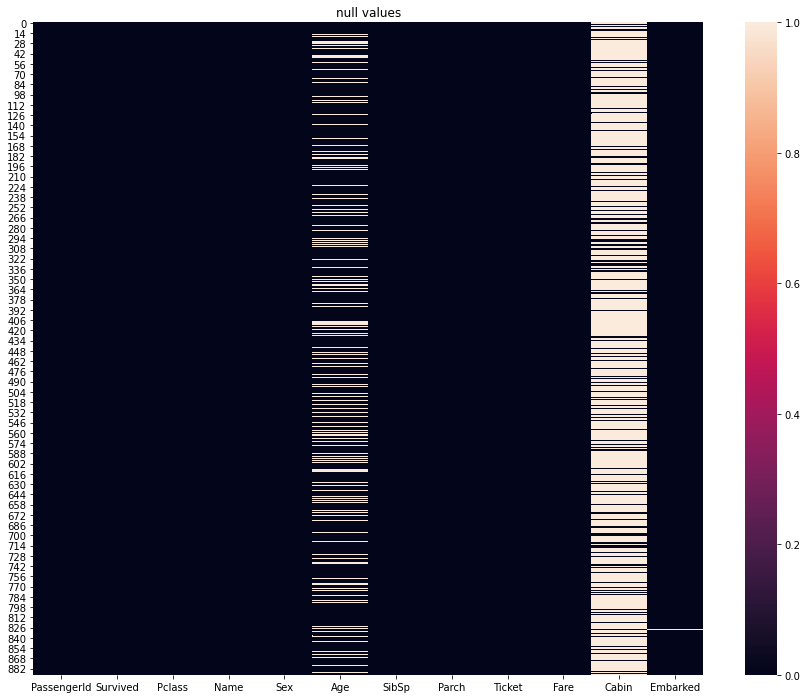

In [11]:
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [12]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
35.00    18
32.00    18
27.00    18
26.00    18
16.00    17
31.00    17
33.00    15
34.00    15
23.00    15
20.00    15
39.00    14
42.00    13
40.00    13
17.00    13
45.00    12
38.00    11
4.00     10
2.00     10
50.00    10
47.00     9
48.00     9
44.00     9
9.00      8
54.00     8
51.00     7
1.00      7
14.00     6
3.00      6
41.00     6
37.00     6
52.00     6
49.00     6
15.00     5
43.00     5
58.00     5
8.00      4
60.00     4
11.00     4
56.00     4
5.00      4
62.00     4
65.00     3
7.00      3
61.00     3
46.00     3
6.00      3
40.50     2
10.00     2
0.75      2
30.50     2
64.00     2
32.50     2
0.83      2
59.00     2
70.00     2
63.00     2
28.50     2
71.00     2
13.00     2
57.00     2
55.00     2
45.50     2
24.50     1
66.00     1
20.50     1
0.67      1
80.00     1
14.50     1
34.50     1
23.50     1
53.00     1
36.50     1
0.42      1
55.5

In [13]:
df['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
D                  3
E101               3
F2                 3
C22 C26            3
C124               2
B35                2
C65                2
E25                2
E121               2
B28                2
B57 B59 B63 B66    2
B20                2
D33                2
E33                2
C52                2
F G73              2
F4                 2
C126               2
D17                2
B58 B60            2
C125               2
B5                 2
C68                2
D35                2
B18                2
B22                2
B51 B53 B55        2
D26                2
E44                2
E8                 2
D20                2
E67                2
B77                2
D36                2
C78                2
C83                2
C93                2
C92                2
C2                 2
C123               2
E24                2
B49                2
D15                1
B79          

In [14]:
#treating null values
df["Age"]=df["Age"].replace(np.NaN,df["Age"].mean())
print(df["Age"][:20])

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
Name: Age, dtype: float64


In [15]:
df['Cabin'] = df["Cabin"].fillna(df['Cabin'].mode())
print(df["Cabin"])

0              B96 B98
1                  C85
2                   G6
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [17]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df["Cabin"].value_counts()

G6                 5
B96 B98            5
C23 C25 C27        4
F33                3
D                  3
E101               3
F2                 3
C22 C26            3
C124               2
B35                2
C65                2
E25                2
E121               2
B28                2
B57 B59 B63 B66    2
B20                2
D33                2
E33                2
C52                2
F G73              2
F4                 2
C126               2
D17                2
B58 B60            2
C125               2
B5                 2
C68                2
D35                2
B18                2
B22                2
B51 B53 B55        2
D26                2
E44                2
E8                 2
D20                2
E67                2
B77                2
D36                2
C78                2
C83                2
C93                2
C92                2
C2                 2
C123               2
E24                2
B49                2
D15                1
B79          

In [20]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['Sex', 'Cabin', 'Embarked'])
print(one_hot_encoded_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [21]:
df['Fare'] = df['Fare'].astype(int)

In [22]:
df['Age'] = df['Age'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Cabin        206 non-null    object
 11  Embarked     889 non-null    object
dtypes: int32(2), int64(5), object(5)
memory usage: 76.7+ KB


In [25]:
encode = LabelEncoder()
Converted=encode.fit_transform(df["Cabin"]) 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int32
 4   Sex          891 non-null    int32
 5   Age          891 non-null    int32
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int32
 9   Fare         891 non-null    int32
 10  Cabin        891 non-null    int32
 11  Embarked     891 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 59.3 KB


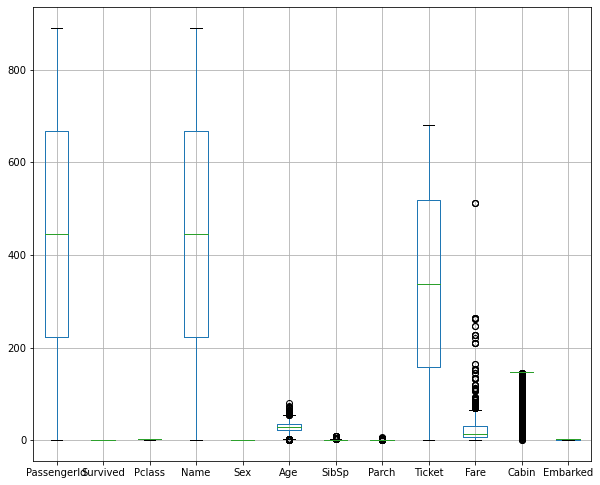

In [27]:
#checking outliers
df.boxplot(figsize=[10,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [29]:
print("shape before and after")
print("shape before.ljust(20)",";",df.shape)
print("shape after.ljust(20)",";",df_new.shape)
print("Percentage Loss".ljust(20),";",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before.ljust(20) ; (891, 12)
shape after.ljust(20) ; (798, 12)
Percentage Loss      ; 0.10437710437710437


In [30]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

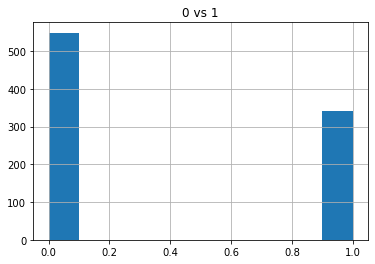

In [31]:
#univariate analysis
df["Survived"].hist(grid=True)
plt.title("0 vs 1")
plt.show

In [ ]:
df.Cabin.unique()

In [32]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df1=df_new[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]     

In [37]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [38]:
#check Skewness
df_new.skew()

PassengerId    0.008531
Survived       0.474816
Pclass        -0.711343
Name           0.005168
Sex           -0.661023
Age            0.343649
SibSp          1.965945
Parch          2.123012
Ticket         0.020723
Fare           2.399598
Cabin         -2.427770
Embarked      -1.301465
dtype: float64

In [39]:
# remove skewness
from sklearn.preprocessing import power_transform
import pandas as pd
df1_new = power_transform(df_new.iloc[:,:-1])
df1_new = pd.DataFrame(df1_new,columns=['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [40]:
df1_new.skew()

PassengerId   -0.278561
Pclass         0.474816
Name          -0.466803
Sex           -0.275416
Age           -0.661023
SibSp          0.079896
Parch          0.933778
Ticket         1.579659
Fare          -0.282204
Cabin         -0.033338
Embarked      -1.726063
dtype: float64

In [41]:
# removing col. doesnt have any significance
del df['Name']

In [42]:
corr_mat=df_new.corr()
corr_mat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.015699,-0.022514,-0.044392,0.070377,0.005901,-0.057643,0.006521,-0.072906,-0.006924,-0.005052,0.018295
Survived,-0.015699,1.000000,-0.320615,-0.035582,-0.556484,-0.097667,0.092976,0.196117,-0.158890,0.320920,-0.245425,-0.148655
Pclass,-0.022514,-0.320615,1.000000,0.045969,0.147360,-0.324999,-0.066876,-0.081111,0.328539,-0.696929,0.650216,0.113710
Name,-0.044392,-0.035582,0.045969,1.000000,-0.001984,0.055171,-0.054919,-0.011384,0.060640,-0.050873,0.055038,-0.007656
Sex,0.070377,-0.556484,0.147360,-0.001984,1.000000,0.096469,-0.199632,-0.249635,0.068152,-0.241919,0.127569,0.118317
Age,0.005901,-0.097667,-0.324999,0.055171,0.096469,1.000000,-0.146348,-0.253546,-0.077650,0.154071,-0.213554,0.015038
SibSp,-0.057643,0.092976,-0.066876,-0.054919,-0.199632,-0.146348,1.000000,0.318332,-0.016695,0.256520,-0.051089,-0.013954
Parch,0.006521,0.196117,-0.081111,-0.011384,-0.249635,-0.253546,0.318332,1.000000,-0.039228,0.257175,-0.071145,-0.017543
Ticket,-0.072906,-0.158890,0.328539,0.060640,0.068152,-0.077650,-0.016695,-0.039228,1.000000,-0.146160,0.229418,0.019885
Fare,-0.006924,0.320920,-0.696929,-0.050873,-0.241919,0.154071,0.256520,0.257175,-0.146160,1.000000,-0.596920,-0.194466


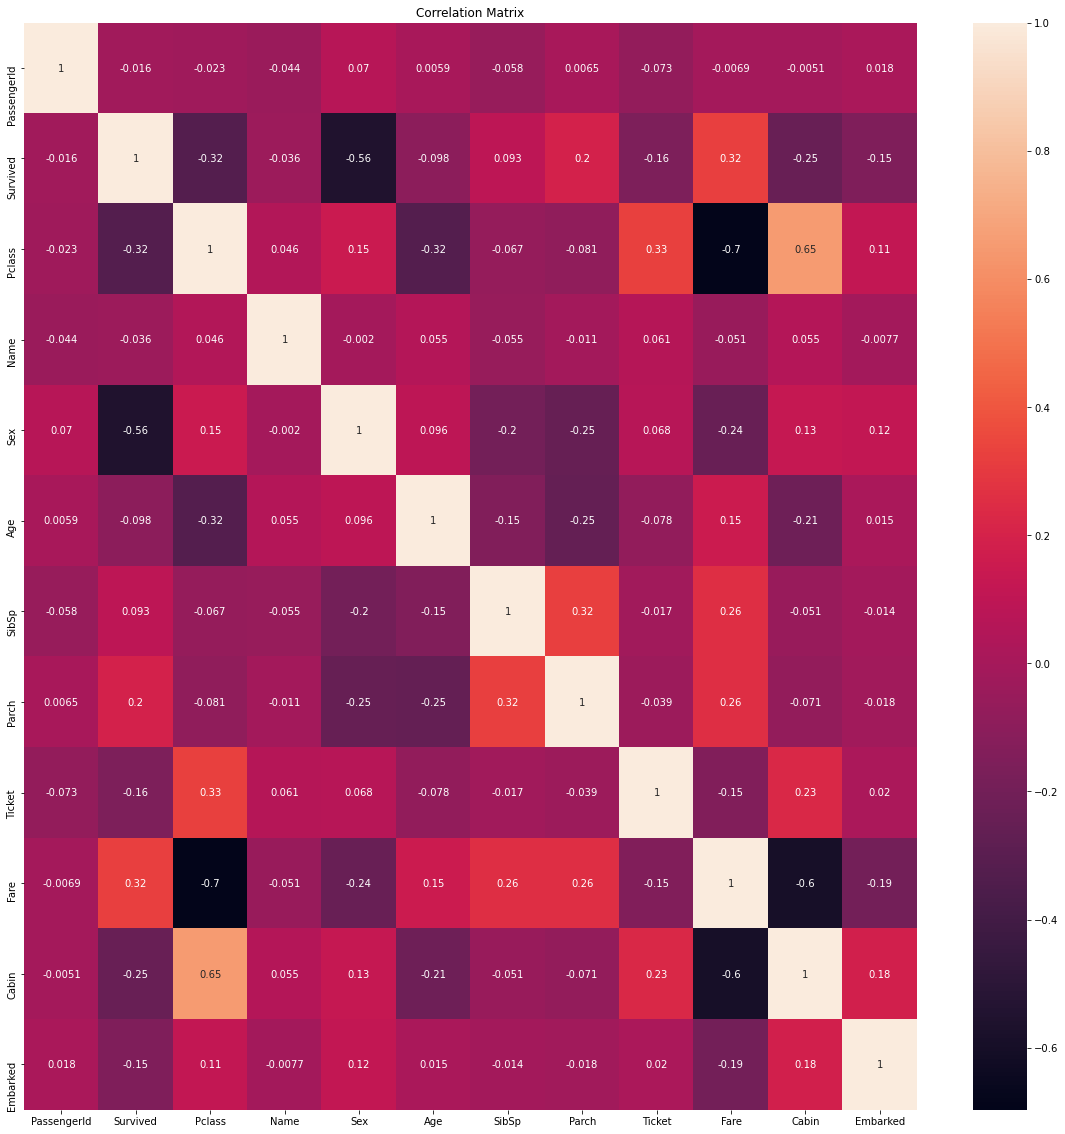

In [43]:
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [45]:
corr_mat=df_new.corr()
corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.320920
Parch          0.196117
SibSp          0.092976
PassengerId   -0.015699
Name          -0.035582
Age           -0.097667
Embarked      -0.148655
Ticket        -0.158890
Cabin         -0.245425
Pclass        -0.320615
Sex           -0.556484
Name: Survived, dtype: float64

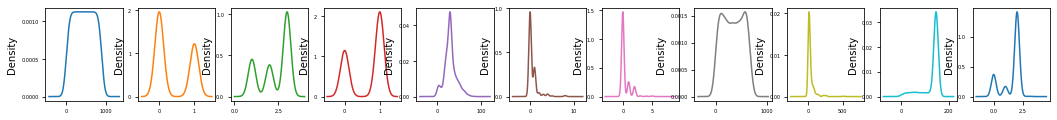

In [46]:
#check distribution for all the colunms
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=5,figsize=(18,12))
plt.show()

In [52]:
!pip install imblearn

In [69]:
#splitting data
x=df.drop("Survived", axis=1)
y=df["Survived"]

In [70]:
#Handling Imbalance by oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [72]:
y_over.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [77]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [83]:
#finding best random State
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc= accuracy_score(y_test, predf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc, "on Random_state", maxRS)

Best accuracy is 0.8789237668161435 on Random_state 11


In [84]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=maxRS)

In [86]:
#model building-Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
prelr = LR.predict(x_test)
print(accuracy_score(y_test,prelr))
print(confusion_matrix(y_test,prelr))
print(classification_report(y_test,prelr))


0.8619402985074627
[[158  18]
 [ 19  73]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       176
           1       0.80      0.79      0.80        92

    accuracy                           0.86       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.753731343283582
[[141  35]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       176
           1       0.64      0.66      0.65        92

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.76      0.75      0.75       268



In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8731343283582089
[[164  12]
 [ 22  70]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       176
           1       0.85      0.76      0.80        92

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268



In [91]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7649253731343284
[[142  34]
 [ 29  63]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       176
           1       0.65      0.68      0.67        92

    accuracy                           0.76       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.77      0.76      0.77       268



In [94]:
#for validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x, y, cv=3)
print("Cross validation score of LogisticRegression model :", scr.mean())

Cross validation score of LogisticRegression model : 0.7979797979797979


In [95]:
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.7081930415263749


In [96]:
scr=cross_val_score(rf, x, y, cv=3)
print("Cross validation score of RandomForest model :", scr.mean())

Cross validation score of RandomForest model : 0.8114478114478114


In [97]:
scr=cross_val_score(svc, x, y, cv=3)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.809203142536476


In [99]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [114]:
#SVC
parameters = {'class_weight' :['dict', 'balanced'],
            'decision_function_shape': ['ovo', 'ovr'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']}

In [115]:
GCV = GridSearchCV(SVC(),parameters,cv=3)

In [117]:
GCV.fit(x_train,y_train)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 555, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight,
  File "C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 63, in compute_class_weight
    raise ValueError("class_weight m

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [118]:
GCV.best_params_

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly'}

In [122]:
mod=SVC(class_weight='balanced', decision_function_shape='ovo', gamma='scale', kernel='poly')

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.19402985074626


In [123]:
#saving model
import joblib
joblib.dump(mod,"TitanicSurvival.pkl")

['TitanicSurvival.pkl']